### In this exercise, we will showcase the implementation of two fundamental machine learning models

#### Linear Regression Model:
> Used to predict continuous numerical variables.
> Implemented to understand relationships between independent and dependent variables.
> Helps in identifying patterns and making predictions based on observed data.
> We are predicting salary based on certain input features like age, gender, education and years of experience

#### Decision Tree Classifier:
> Applied for classification tasks to assign data points to specific categories.
> Utilizes a tree-like structure of decisions based on features to classify instances.
> Effective for both binary and multiclass classification problems.
> We will be classifying data into two categories on the base of salary and will predict the relevant class

#### Preprocessing Techniques:
> **One-Hot-Encoding**: Used for converting categorical variables into numerical format, enabling the model to interpret them effectively.
> **MinMaxScaler Technique**: Employed for feature scaling to normalize the range of independent variables, enhancing the performance of the models.

### Linear Regression Model

In [3]:
## Importing Libraries
# !pip install -U scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
# Reading the dataset
salary = pd.read_csv("Salary Data.csv")

In [5]:
salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [7]:
# Find if there are any null entries
salary.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [8]:
salary[salary.isnull().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Drop rows where the null entry is
salary.dropna(inplace=True)
salary.drop_duplicates(inplace=True)

In [10]:
salary.describe()

,Age,Years of Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


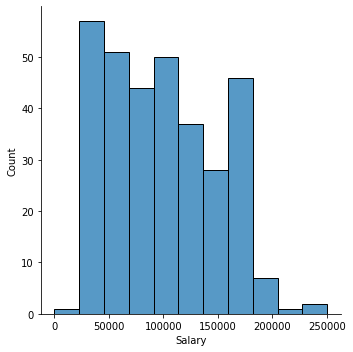

In [11]:
sns.displot(salary['Salary'])

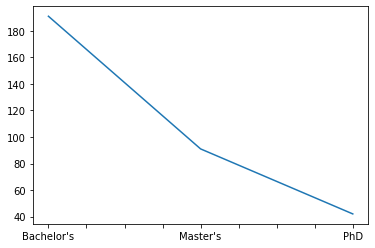

In [12]:
salary['Education Level'].value_counts().plot(kind='line')
plt.show()

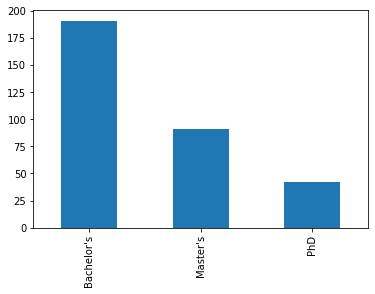

In [13]:
salary['Education Level'].value_counts().plot(kind='bar')
plt.show()

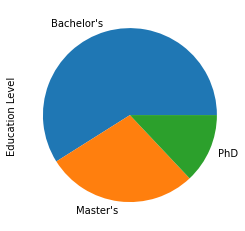

In [221]:
salary['Education Level'].value_counts().plot(kind='pie')
plt.show()

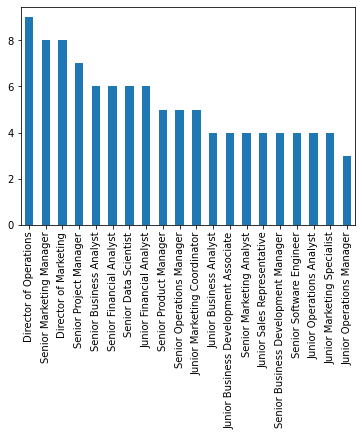

In [14]:
salary['Job Title'].value_counts().head(20).plot(kind='bar')
plt.show()

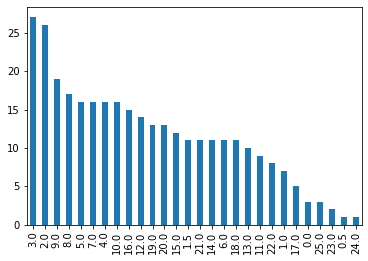

In [15]:
salary['Years of Experience'].value_counts().plot(kind='bar')
plt.show()

In [223]:
salary_cleaned = pd.get_dummies(salary, columns=['Gender', 'Education Level', 'Job Title'], drop_first=True)

## If you are getting true or false select dtype = int
## drop_first = True, 

# Dropping the first level when creating the dummy variables through one-hot encoding is primarily done
# to avoid multicollinearity and reduce redundancy in the dataset. Including fewer dummy variables can lead to
# more effecient models especially when dealing with large datasets or complex models

In [224]:
salary_cleaned

,Age,Years of Experience,Salary,Gender_Male,Education Level_Master's,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,90000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28.0,3.0,65000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,15.0,150000.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,7.0,60000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,20.0,200000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,28.0,1.0,35000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
349,36.0,8.0,110000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,44.0,16.0,160000.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
351,31.0,3.0,55000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
X = salary_cleaned.drop(['Salary'], axis=1) # This is the output so we keeping it seperate - axis=1 specifies the column
y = salary_cleaned['Salary']

In [226]:
# Splitting the dataset in test and train 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [227]:
## Linear Rregression - Training the model

lm = LinearRegression()
lm.fit(X_train, y_train) # Remember Here: We are Passing the training data to the model
print("Linear Regression Model Trained Successfully!")


Linear Regression Model Trained Successfully!


In [228]:
trained_feature_names = X_train.columns.tolist()
print(trained_feature_names)

['Age', 'Years of Experience', 'Gender_Male', "Education Level_Master's", 'Education Level_PhD', 'Job Title_Accountant', 'Job Title_Administrative Assistant', 'Job Title_Business Analyst', 'Job Title_Business Development Manager', 'Job Title_Business Intelligence Analyst', 'Job Title_CEO', 'Job Title_Chief Data Officer', 'Job Title_Chief Technology Officer', 'Job Title_Content Marketing Manager', 'Job Title_Copywriter', 'Job Title_Creative Director', 'Job Title_Customer Service Manager', 'Job Title_Customer Service Rep', 'Job Title_Customer Service Representative', 'Job Title_Customer Success Manager', 'Job Title_Customer Success Rep', 'Job Title_Data Analyst', 'Job Title_Data Entry Clerk', 'Job Title_Data Scientist', 'Job Title_Digital Content Producer', 'Job Title_Digital Marketing Manager', 'Job Title_Director', 'Job Title_Director of Business Development', 'Job Title_Director of Engineering', 'Job Title_Director of Finance', 'Job Title_Director of HR', 'Job Title_Director of Human 

In [254]:
input_age = 25.0
input_gender = "Male"
input_education_level = "Master's"
input_job_title = "Senior Data Engineer"
input_years_of_experience = 3


# Preprocess the input data to match the training format
input_data = pd.DataFrame({
    'Age': [input_age],
    'Gender_Male': [1 if input_gender == 'Male' else 0],
    'Gender_Female': [1 if input_gender == 'Female' else 0],
    'Education Level_Bachelor\'s': [1 if input_education_level == "Bachelor's" else 0],
    'Education Level_Master\'s': [1 if input_education_level == "Master's" else 0],
    'Education Level_PhD': [1 if input_education_level == "PhD" else 0],
    # for Job titles
    'Job Title_Software Engineer': [1 if input_job_title == 'Software Engineer' else 0],
    'Job Title_Accountant': [1 if input_job_title == 'Accountant' else 0],
    'Job Title_Administrative Assistant': [1 if input_job_title == 'Administrative Assistant' else 0],
    'Job Title_Business Analyst': [1 if input_job_title == 'Business Analyst' else 0],
    'Job Title_Business Development Manager': [1 if input_job_title == 'Business Development Manager' else 0],
    'Job Title_Business Intelligence Analyst': [1 if input_job_title == 'Business Intelligence Analyst' else 0],
    'Job Title_CEO': [1 if input_job_title == 'CEO' else 0],
    'Job Title_Chief Data Officer': [1 if input_job_title == 'Chief Data Officer' else 0],
    'Job Title_Chief Technology Officer': [1 if input_job_title == 'Chief Technology Officer' else 0],
    'Job Title_Content Marketing Manager': [1 if input_job_title == 'Content Marketing Manager' else 0],
    'Job Title_Copywriter': [1 if input_job_title == 'Copywriter' else 0],
    'Job Title_Creative Director': [1 if input_job_title == 'Creative Director' else 0],
    'Job Title_Customer Service Manager': [1 if input_job_title == 'Customer Service Manager' else 0],
    'Job Title_Customer Service Rep': [1 if input_job_title == 'Customer Service Rep' else 0],
    'Job Title_Customer Service Representative': [1 if input_job_title == 'Customer Service Representative' else 0],
    'Job Title_Customer Success Manager': [1 if input_job_title == 'Customer Success Manager' else 0],
    'Job Title_Customer Success Rep': [1 if input_job_title == 'Customer Success Rep' else 0],
    'Job Title_Data Analyst': [1 if input_job_title == 'Data Analyst' else 0],
    'Job Title_Data Entry Clerk': [1 if input_job_title == 'Data Entry Clerk' else 0],
    'Job Title_Data Scientist': [1 if input_job_title == 'Data Scientist' else 0],
    'Job Title_Digital Content Producer': [1 if input_job_title == 'Digital Content Producer' else 0],
    'Job Title_Digital Marketing Manager': [1 if input_job_title == 'Digital Marketing Manager' else 0],
    'Job Title_Director': [1 if input_job_title == 'Director' else 0],
    'Job Title_Director of Business Development': [1 if input_job_title == 'Director of Business Development' else 0],
    'Job Title_Director of Engineering': [1 if input_job_title == 'Director of Engineering' else 0],
    'Job Title_Director of Finance': [1 if input_job_title == 'Director of Finance' else 0],
    'Job Title_Director of HR': [1 if input_job_title == 'Director of HR' else 0],
    'Job Title_Director of Human Capital': [1 if input_job_title == 'Director of Human Capital' else 0],
    'Job Title_Director of Human Resources': [1 if input_job_title == 'Director of Human Resources' else 0],
    'Job Title_Director of Marketing': [1 if input_job_title == 'Director of Marketing' else 0],
    'Job Title_Director of Operations': [1 if input_job_title == 'Director of Operations' else 0],
    'Job Title_Director of Product Management': [1 if input_job_title == 'Director of Product Management' else 0],
    'Job Title_Director of Sales': [1 if input_job_title == 'Director of Sales' else 0],
    'Job Title_Director of Sales and Marketing': [1 if input_job_title == 'Director of Sales and Marketing' else 0],
    'Job Title_Event Coordinator': [1 if input_job_title == 'Event Coordinator' else 0],
    'Job Title_Financial Advisor': [1 if input_job_title == 'Financial Advisor' else 0],
    'Job Title_Financial Analyst': [1 if input_job_title == 'Financial Analyst' else 0],
    'Job Title_Financial Manager': [1 if input_job_title == 'Financial Manager' else 0],
    'Job Title_Graphic Designer': [1 if input_job_title == 'Graphic Designer' else 0],
    'Job Title_HR Generalist': [1 if input_job_title == 'HR Generalist' else 0],
    'Job Title_HR Manager': [1 if input_job_title == 'HR Manager' else 0],
    'Job Title_Help Desk Analyst': [1 if input_job_title == 'Help Desk Analyst' else 0],
    'Job Title_Human Resources Director': [1 if input_job_title == 'Human Resources Director' else 0],
    'Job Title_IT Manager': [1 if input_job_title == 'IT Manager' else 0],
    'Job Title_IT Support': [1 if input_job_title == 'IT Support' else 0],
    'Job Title_IT Support Specialist': [1 if input_job_title == 'IT Support Specialist' else 0],
    'Job Title_Junior Account Manager': [1 if input_job_title == 'Junior Account Manager' else 0],
    'Job Title_Junior Accountant': [1 if input_job_title == 'Junior Accountant' else 0],
    'Job Title_Junior Advertising Coordinator': [1 if input_job_title == 'Junior Advertising Coordinator' else 0],
    'Job Title_Junior Business Analyst': [1 if input_job_title == 'Junior Business Analyst' else 0],
    'Job Title_Junior Business Development Associate': [1 if input_job_title == 'Junior Business Development Associate' else 0],
    'Job Title_Junior Business Operations Analyst': [1 if input_job_title == 'Junior Business Operations Analyst' else 0],
    'Job Title_Junior Copywriter': [1 if input_job_title == 'Junior Copywriter' else 0],
    'Job Title_Junior Customer Support Specialist': [1 if input_job_title == 'Junior Customer Support Specialist' else 0],
    'Job Title_Junior Data Analyst': [1 if input_job_title == 'Junior Data Analyst' else 0],
    'Job Title_Junior Data Scientist': [1 if input_job_title == 'Junior Data Scientist' else 0],
    'Job Title_Junior Designer': [1 if input_job_title == 'Junior Designer' else 0],
    'Job Title_Junior Developer': [1 if input_job_title == 'Junior Developer' else 0],
    'Job Title_Junior Financial Advisor': [1 if input_job_title == 'Junior Financial Advisor' else 0],
    'Job Title_Junior Financial Analyst': [1 if input_job_title == 'Junior Financial Analyst' else 0],
    'Job Title_Junior HR Coordinator': [1 if input_job_title == 'Junior HR Coordinator' else 0],
    'Job Title_Junior HR Generalist': [1 if input_job_title == 'Junior HR Generalist' else 0],
    'Job Title_Junior Marketing Analyst': [1 if input_job_title == 'Junior Marketing Analyst' else 0],
    'Job Title_Junior Marketing Coordinator': [1 if input_job_title == 'Junior Marketing Coordinator' else 0],
    'Job Title_Junior Marketing Manager': [1 if input_job_title == 'Junior Marketing Manager' else 0],
    'Job Title_Junior Marketing Specialist': [1 if input_job_title == 'Junior Marketing Specialist' else 0],
    'Job Title_Junior Operations Analyst': [1 if input_job_title == 'Junior Operations Analyst' else 0],
    'Job Title_Junior Operations Coordinator': [1 if input_job_title == 'Junior Operations Coordinator' else 0],
    'Job Title_Junior Operations Manager': [1 if input_job_title == 'Junior Operations Manager' else 0],
    'Job Title_Junior Product Manager': [1 if input_job_title == 'Junior Product Manager' else 0],
    'Job Title_Junior Project Manager': [1 if input_job_title == 'Junior Project Manager' else 0],
    'Job Title_Junior Recruiter': [1 if input_job_title == 'Junior Recruiter' else 0],
    'Job Title_Junior Research Scientist': [1 if input_job_title == 'Junior Research Scientist' else 0],
    'Job Title_Junior Sales Representative': [1 if input_job_title == 'Junior Sales Representative' else 0],
    'Job Title_Junior Social Media Manager': [1 if input_job_title == 'Junior Social Media Manager' else 0],
    'Job Title_Junior Social Media Specialist': [1 if input_job_title == 'Junior Social Media Specialist' else 0],
    'Job Title_Junior Software Developer': [1 if input_job_title == 'Junior Software Developer' else 0],
    'Job Title_Junior Software Engineer': [1 if input_job_title == 'Junior Software Engineer' else 0],
    'Job Title_Junior UX Designer': [1 if input_job_title == 'Junior UX Designer' else 0],
    'Job Title_Junior Web Designer': [1 if input_job_title == 'Junior Web Designer' else 0],
    'Job Title_Junior Web Developer': [1 if input_job_title == 'Junior Web Developer' else 0],
    'Job Title_Marketing Analyst': [1 if input_job_title == 'Marketing Analyst' else 0],
    'Job Title_Marketing Coordinator': [1 if input_job_title == 'Marketing Coordinator' else 0],
    'Job Title_Marketing Manager': [1 if input_job_title == 'Marketing Manager' else 0],
    'Job Title_Marketing Specialist': [1 if input_job_title == 'Marketing Specialist' else 0],
    'Job Title_Network Engineer': [1 if input_job_title == 'Network Engineer' else 0],
    'Job Title_Office Manager': [1 if input_job_title == 'Office Manager' else 0],
    'Job Title_Operations Analyst': [1 if input_job_title == 'Operations Analyst' else 0],
    'Job Title_Operations Director': [1 if input_job_title == 'Operations Director' else 0],
    'Job Title_Operations Manager': [1 if input_job_title == 'Operations Manager' else 0],
    'Job Title_Principal Engineer': [1 if input_job_title == 'Principal Engineer' else 0],
    'Job Title_Principal Scientist': [1 if input_job_title == 'Principal Scientist' else 0],
    'Job Title_Product Designer': [1 if input_job_title == 'Product Designer' else 0],
    'Job Title_Product Manager': [1 if input_job_title == 'Product Manager' else 0],
    'Job Title_Product Marketing Manager': [1 if input_job_title == 'Product Marketing Manager' else 0],
    'Job Title_Project Engineer': [1 if input_job_title == 'Project Engineer' else 0],
    'Job Title_Project Manager': [1 if input_job_title == 'Project Manager' else 0],
    'Job Title_Public Relations Manager': [1 if input_job_title == 'Public Relations Manager' else 0],
    'Job Title_Recruiter': [1 if input_job_title == 'Recruiter' else 0],
    'Job Title_Research Director': [1 if input_job_title == 'Research Director' else 0],
    'Job Title_Research Scientist': [1 if input_job_title == 'Research Scientist' else 0],
    'Job Title_Sales Associate': [1 if input_job_title == 'Sales Associate' else 0],
    'Job Title_Sales Director': [1 if input_job_title == 'Sales Director' else 0],
    'Job Title_Sales Executive': [1 if input_job_title == 'Sales Executive' else 0],
    'Job Title_Sales Manager': [1 if input_job_title == 'Sales Manager' else 0],
    'Job Title_Sales Operations Manager': [1 if input_job_title == 'Sales Operations Manager' else 0],
    'Job Title_Sales Representative': [1 if input_job_title == 'Sales Representative' else 0],
    'Job Title_Senior Account Executive': [1 if input_job_title == 'Senior Account Executive' else 0],
    'Job Title_Senior Account Manager': [1 if input_job_title == 'Senior Account Manager' else 0],
    'Job Title_Senior Accountant': [1 if input_job_title == 'Senior Accountant' else 0],
    'Job Title_Senior Business Analyst': [1 if input_job_title == 'Senior Business Analyst' else 0],
    'Job Title_Senior Business Development Manager': [1 if input_job_title == 'Senior Business Development Manager' else 0],
    'Job Title_Senior Consultant': [1 if input_job_title == 'Senior Consultant' else 0],
    'Job Title_Senior Data Analyst': [1 if input_job_title == 'Senior Data Analyst' else 0],
    'Job Title_Senior Data Engineer': [1 if input_job_title == 'Senior Data Engineer' else 0],
    'Job Title_Senior Data Scientist': [1 if input_job_title == 'Senior Data Scientist' else 0],
    'Job Title_Senior Engineer': [1 if input_job_title == 'Senior Engineer' else 0],
    'Job Title_Senior Financial Advisor': [1 if input_job_title == 'Senior Financial Advisor' else 0],
    'Job Title_Senior Financial Analyst': [1 if input_job_title == 'Senior Financial Analyst' else 0],
    'Job Title_Senior Financial Manager': [1 if input_job_title == 'Senior Financial Manager' else 0],
    'Job Title_Senior Graphic Designer': [1 if input_job_title == 'Senior Graphic Designer' else 0],
    'Job Title_Senior HR Generalist': [1 if input_job_title == 'Senior HR Generalist' else 0],
    'Job Title_Senior HR Manager': [1 if input_job_title == 'Senior HR Manager' else 0],
    'Job Title_Senior HR Specialist': [1 if input_job_title == 'Senior HR Specialist' else 0],
    'Job Title_Senior Human Resources Coordinator': [1 if input_job_title == 'Senior Human Resources Coordinator' else 0],
    'Job Title_Senior Human Resources Manager': [1 if input_job_title == 'Senior Human Resources Manager' else 0],
    'Job Title_Senior Human Resources Specialist': [1 if input_job_title == 'Senior Human Resources Specialist' else 0],
    'Job Title_Senior IT Consultant': [1 if input_job_title == 'Senior IT Consultant' else 0],
    'Job Title_Senior IT Project Manager': [1 if input_job_title == 'Senior IT Project Manager' else 0],
    'Job Title_Senior IT Support Specialist': [1 if input_job_title == 'Senior IT Support Specialist' else 0],
    'Job Title_Senior Marketing Analyst': [1 if input_job_title == 'Senior Marketing Analyst' else 0],
    'Job Title_Senior Manager': [1 if input_job_title == 'Senior Manager' else 0],
    'Job Title_Senior Marketing Coordinator': [1 if input_job_title == 'Senior Marketing Coordinator' else 0],
    'Job Title_Senior Marketing Director': [1 if input_job_title == 'Senior Marketing Director' else 0],
    'Job Title_Senior Marketing Manager': [1 if input_job_title == 'Senior Marketing Manager' else 0],
    'Job Title_Senior Marketing Specialist': [1 if input_job_title == 'Senior Marketing Specialist' else 0],
    'Job Title_Senior Operations Analyst': [1 if input_job_title == 'Senior Operations Analyst' else 0],
    'Job Title_Senior Operations Coordinator': [1 if input_job_title == 'Senior Operations Coordinator' else 0],
    'Job Title_Senior Operations Manager': [1 if input_job_title == 'Senior Operations Manager' else 0],
    'Job Title_Senior Product Designer': [1 if input_job_title == 'Senior Product Designer' else 0],
    'Job Title_Senior Product Development Manager': [1 if input_job_title == 'Senior Product Development Manager' else 0],
    'Job Title_Senior Product Manager': [1 if input_job_title == 'Senior Product Manager' else 0],
    'Job Title_Senior Product Marketing Manager': [1 if input_job_title == 'Senior Product Marketing Manager' else 0],
    'Job Title_Senior Project Coordinator': [1 if input_job_title == 'Senior Project Coordinator' else 0],
    'Job Title_Senior Project Manager': [1 if input_job_title == 'Senior Project Manager' else 0],
    'Job Title_Senior Quality Assurance Analyst': [1 if input_job_title == 'Senior Quality Assurance Analyst' else 0],
    'Job Title_Senior Research Scientist': [1 if input_job_title == 'Senior Research Scientist' else 0],
    'Job Title_Senior Researcher': [1 if input_job_title == 'Senior Researcher' else 0],
    'Job Title_Senior Sales Manager': [1 if input_job_title == 'Senior Sales Manager' else 0],
    'Job Title_Senior Sales Representative': [1 if input_job_title == 'Senior Sales Representative' else 0],
    'Job Title_Senior Scientist': [1 if input_job_title == 'Senior Scientist' else 0],
    'Job Title_Senior Software Architect': [1 if input_job_title == 'Senior Software Architect' else 0],
    'Job Title_Senior Software Developer': [1 if input_job_title == 'Senior Software Developer' else 0],
    'Job Title_Senior Software Engineer': [1 if input_job_title == 'Senior Software Engineer' else 0],
    'Job Title_Senior Training Specialist': [1 if input_job_title == 'Senior Training Specialist' else 0],
    'Job Title_Senior UX Designer': [1 if input_job_title == 'Senior UX Designer' else 0],
    'Job Title_Social Media Manager': [1 if input_job_title == 'Social Media Manager' else 0],
    'Job Title_Social Media Specialist': [1 if input_job_title == 'Social Media Specialist' else 0],
    'Job Title_Software Developer': [1 if input_job_title == 'Software Developer' else 0],
    'Job Title_Software Manager': [1 if input_job_title == 'Software Manager' else 0],
    'Job Title_Software Project Manager': [1 if input_job_title == 'Software Project Manager' else 0],
    'Job Title_Strategy Consultant': [1 if input_job_title == 'Strategy Consultant' else 0],
    'Job Title_Supply Chain Analyst': [1 if input_job_title == 'Supply Chain Analyst' else 0],
    'Job Title_Supply Chain Manager': [1 if input_job_title == 'Supply Chain Manager' else 0],
    'Job Title_Technical Recruiter': [1 if input_job_title == 'Technical Recruiter' else 0],
    'Job Title_Technical Support Specialist': [1 if input_job_title == 'Technical Support Specialist' else 0],
    'Job Title_Technical Writer': [1 if input_job_title == 'Technical Writer' else 0],
    'Job Title_Training Specialist': [1 if input_job_title == 'Training Specialist' else 0],
    'Job Title_UX Designer': [1 if input_job_title == 'UX Designer' else 0],
    'Job Title_UX Researcher': [1 if input_job_title == 'UX Researcher' else 0],
    'Job Title_VP of Finance': [1 if input_job_title == 'VP of Finance' else 0],
    'Job Title_VP of Operations': [1 if input_job_title == 'VP of Operations' else 0],
    'Job Title_Web Developer': [1 if input_job_title == 'Web Developer' else 0],
    'Years of Experience': [input_years_of_experience]
})

In [255]:
# Ensure the feature order matches the one used for training
input_data = input_data[X_train.columns]

In [256]:
input_data

,Age,Years of Experience,Gender_Male,Education Level_Master's,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,Job Title_Business Intelligence Analyst,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,25.0,3,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [259]:
# Make predictions for the input data
predicted_salary = lm.predict(input_data)

In [260]:
predicted_salary

array([85408.86783617])

In [242]:
# Print the predicted salary
print("Predicted Salary for Input Data:", predicted_salary[0])

Predicted Salary for Input Data: 45315.118871633575


In [235]:
## Mean Square Error

from sklearn import metrics
predictions = lm.predict(X_test)
mse = metrics.mean_squared_error(y_test,predictions)
mse

383113168.4838836

Text(0.5, 1.0, 'Predicted versus actual values (MSE=383113168.48)')

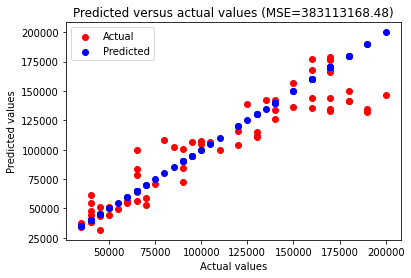

In [236]:
plt.scatter(y_test, predictions, c='red', label='Actual')
plt.scatter(y_test, y_test, c='blue', label='Predicted')

plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted versus actual values (MSE={:.2f})".format(mse))
plt.legend()
plt.title("Predicted versus actual values (MSE={:.2f})".format(mse))

In [261]:
print("Model Score", lm.score(X_test, y_test)*100)


Model Score 85.3579819098006


In [266]:
coefficients = lm.coef_

# Get the intercept (c value)
intercept = lm.intercept_

print("Coefficients (m values):", coefficients)
print("Intercept (c value):", intercept)

Coefficients (m values): [ 2.47787704e+03  1.13357268e+03  6.77119055e+02  5.33913033e+03
  1.22137748e+04 -1.57114312e+04 -4.24854954e+04 -4.68139388e+03
  1.30439753e+03 -8.41527430e+01  1.07726760e+05  9.05824011e+04
  9.16908034e+04 -1.20999815e+04 -2.10106547e+04  5.35706416e+03
 -1.36709893e+04 -1.92098967e+04 -2.68450039e+04 -2.16877738e+04
  6.43922249e-09 -2.48335775e+03 -1.63098782e+04  6.91215973e-11
 -1.70999815e+04  7.37418304e-09 -1.68256520e-09 -6.14818418e-09
  4.50964649e+04 -1.04791980e-08  4.36883658e+04  4.00769161e+04
  3.80502671e+04  4.27331494e+04  3.45117059e+04  3.68776741e+04
  4.65784506e+04 -8.59284910e-09 -3.44629550e+04  4.71437122e+03
 -8.76570994e-09  2.82913948e+04 -1.46221045e+04 -2.47526408e+04
 -5.39313228e+03 -1.69869973e+04  4.36883658e+04 -5.56029615e+03
 -1.66435279e+04 -2.71786535e+04 -1.67663888e+04 -1.90602850e+04
 -2.27771006e+04 -2.20686176e+04 -2.48047596e+04 -4.59238645e+04
 -2.20999815e+04 -2.17320197e+04 -2.71786535e+04 -1.58272446e+04


## Decision Tree Regressor

In [262]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=1)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [263]:
y_pred = model.predict(X_test)

In [264]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.84697892780092

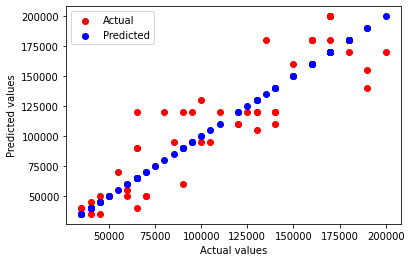

In [265]:
plt.scatter(y_test, y_pred, c='red', label='Actual')
plt.scatter(y_test, y_test, c='blue', label='Predicted')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.legend()

## Classification Model Exercise

In [16]:
salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


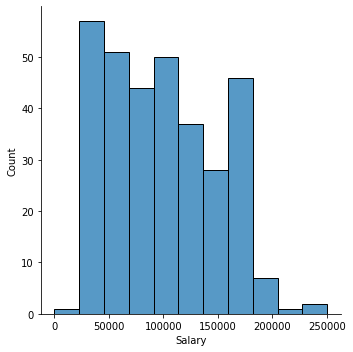

In [17]:
sns.displot(salary['Salary'])

In [18]:
salary['Salary_Greater_90k'] = salary['Salary'].apply(lambda x: 1 if x > 90000.0 else 0)


In [19]:
salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Salary_Greater_90k
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0
4,52.0,Male,Master's,Director,20.0,200000.0,1
...,...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0,0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0,1
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0,1
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0,0


In [20]:
salary['Salary_Greater_90k'].value_counts()

1    171
0    153
Name: Salary_Greater_90k, dtype: int64

In [21]:
## Think of finding/exploring the jobs with highest salaries
high_salary_df = salary[salary['Salary_Greater_90k'] != 0]

In [25]:
job_title_counts = high_salary_df['Job Title'].value_counts()

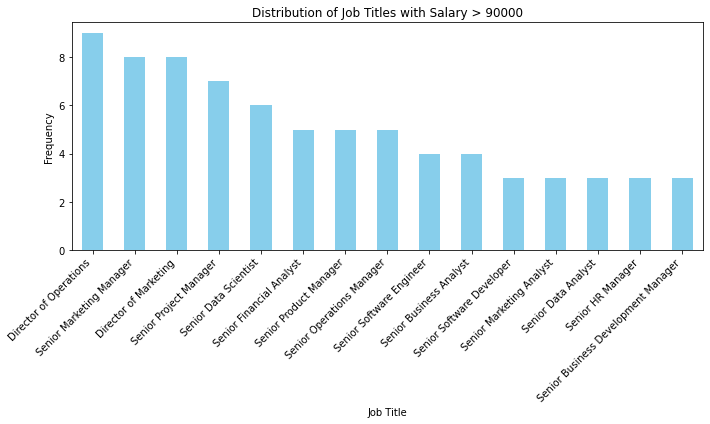

In [27]:
# Plot the distribution of job titles
plt.figure(figsize=(10, 6))
job_title_counts.head(15).plot(kind='bar', color='skyblue')
plt.title('Distribution of Job Titles with Salary > 90000')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [31]:
# See distribution of age where salary is greater than 90k
age_df = salary[salary['Salary_Greater_90k'] != 0]
age_df2 = salary[salary['Salary_Greater_90k'] != 1]


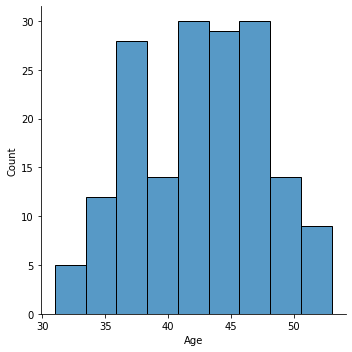

In [30]:
# Age distribution where salary is > 90k
sns.displot(age_df['Age'])

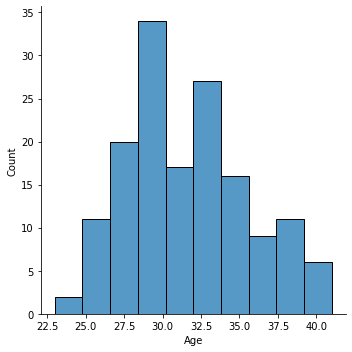

In [32]:
# Age distribution where salary is < 90k
sns.displot(age_df2['Age'])

In [33]:
enc = LabelEncoder()

In [38]:
# Applying encoding technique to convert categorical data into Numerical

for column in salary.columns:
    if salary[column].dtype == 'object':  # Check if the column is categorical
        salary[column] = enc.fit_transform(salary[column])

In [39]:
salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Salary_Greater_90k
0,32.0,1,0,159,5.0,90000.0,0
1,28.0,0,1,17,3.0,65000.0,0
2,45.0,1,2,130,15.0,150000.0,1
3,36.0,0,0,101,7.0,60000.0,0
4,52.0,1,1,22,20.0,200000.0,1
...,...,...,...,...,...,...,...
348,28.0,0,0,68,1.0,35000.0,0
349,36.0,1,0,111,8.0,110000.0,1
350,44.0,0,2,115,16.0,160000.0,1
351,31.0,1,0,63,3.0,55000.0,0


/home/oem/.local/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


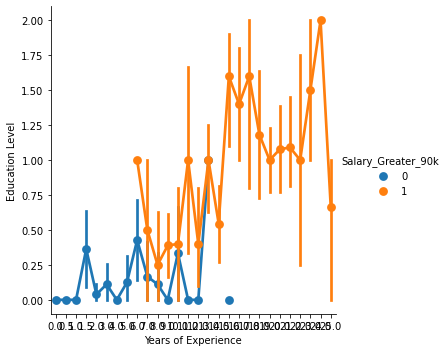

In [45]:
sns.factorplot(data=salary, x='Years of Experience', y='Education Level' , hue='Salary_Greater_90k', kind='point')


In [47]:
## Applying Min Max Scaler to keep the data range from (0-1)

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Define columns to scale
columns_to_scale = ['Age', 'Gender', 'Education Level', 'Job Title','Years of Experience']

# Initialize MinMaxScaler
mmsc = MinMaxScaler()

# Scale the selected columns and assign the scaled values directly to the DataFrame columns
salary[columns_to_scale] = mmsc.fit_transform(salary[columns_to_scale])

# Print the DataFrame to verify the changes
print(salary)

          Age  Gender  Education Level  Job Title  Years of Experience  \
0    0.300000     1.0              0.0   0.919075                 0.20   
1    0.166667     0.0              0.5   0.098266                 0.12   
2    0.733333     1.0              1.0   0.751445                 0.60   
3    0.433333     0.0              0.0   0.583815                 0.28   
4    0.966667     1.0              0.5   0.127168                 0.80   
..        ...     ...              ...        ...                  ...   
348  0.166667     0.0              0.0   0.393064                 0.04   
349  0.433333     1.0              0.0   0.641618                 0.32   
350  0.700000     0.0              1.0   0.664740                 0.64   
351  0.266667     1.0              0.0   0.364162                 0.12   
371  0.666667     1.0              0.5   0.173410                 0.76   

       Salary  Salary_Greater_90k  
0     90000.0                   0  
1     65000.0                   0  
2  

In [48]:
salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Salary_Greater_90k
0,0.300000,1.0,0.0,0.919075,0.20,90000.0,0
1,0.166667,0.0,0.5,0.098266,0.12,65000.0,0
2,0.733333,1.0,1.0,0.751445,0.60,150000.0,1
3,0.433333,0.0,0.0,0.583815,0.28,60000.0,0
4,0.966667,1.0,0.5,0.127168,0.80,200000.0,1
...,...,...,...,...,...,...,...
348,0.166667,0.0,0.0,0.393064,0.04,35000.0,0
349,0.433333,1.0,0.0,0.641618,0.32,110000.0,1
350,0.700000,0.0,1.0,0.664740,0.64,160000.0,1
351,0.266667,1.0,0.0,0.364162,0.12,55000.0,0


In [50]:
# We need to get rid of salary column specifically and then Salary Greater than 90k column which will be
# used as a predicted value with 0 or 1
X = salary.drop(columns=['Salary','Salary_Greater_90k'], axis=1)
y = salary['Salary_Greater_90k']

In [51]:
X

,Age,Gender,Education Level,Job Title,Years of Experience
0,0.300000,1.0,0.0,0.919075,0.20
1,0.166667,0.0,0.5,0.098266,0.12
2,0.733333,1.0,1.0,0.751445,0.60
3,0.433333,0.0,0.0,0.583815,0.28
4,0.966667,1.0,0.5,0.127168,0.80
...,...,...,...,...,...
348,0.166667,0.0,0.0,0.393064,0.04
349,0.433333,1.0,0.0,0.641618,0.32
350,0.700000,0.0,1.0,0.664740,0.64
351,0.266667,1.0,0.0,0.364162,0.12


In [63]:
y

0      0
1      0
2      1
3      0
4      1
      ..
348    0
349    1
350    1
351    0
371    1
Name: Salary_Greater_90k, Length: 324, dtype: int64

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)


In [75]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


## Model Training 

In [79]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)


In [80]:
prediction = dtree.predict(X_test)
prediction

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [81]:
print("Accuracy of the model : ",metrics.accuracy_score(y_test,prediction)*100)

Accuracy of the model :  89.23076923076924


              precision    recall  f1-score   support

           0       1.00      0.77      0.87        30
           1       0.83      1.00      0.91        35

    accuracy                           0.89        65
   macro avg       0.92      0.88      0.89        65
weighted avg       0.91      0.89      0.89        65



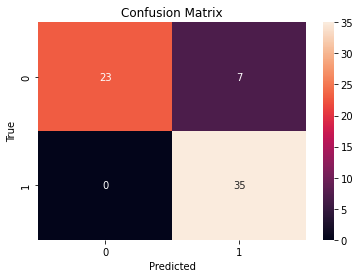

In [82]:
matrix = confusion_matrix(y_test, prediction)
sns.heatmap(matrix, annot= True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
print(classification_report(y_test,prediction))